# Google Playstore Dataset

#### Complete EDA Analysis

### About Dataset

`Description`\
The dataset was downloaded from kaggle, from the following [Link]('https://www.kaggle.com/datasets/lava18/google-play-store-apps')

**Context**\
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content**\
Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements**\
This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration**\
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

`Importing Required libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Datasets/googleplaystore.csv')

In [3]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up


In [4]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [6]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [7]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [8]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [9]:
df.Size.isnull().sum()

0

In [10]:
M=df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

In [11]:
K=df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

In [12]:
varies=df['Size'].loc[df['Size'].str.contains('Varies')].value_counts().sum()

In [13]:
M+K+varies

10841

In [14]:
len(df['Size'])

10841

In [15]:
def convert_size(size):
    """Convert a size in bytes to a human-readable format."""
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k',""))*1024
        elif 'M' in size:
            return float(size.replace('M',''))*1024*1024
        elif 'Varies' in size:
            return np.nan
    return size

In [16]:
df['Size']=df['Size'].apply(convert_size)

In [17]:
df.Size

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10841, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [19]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [20]:
df.Installs.value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [21]:
df.rename(columns={'Size':'Size in Bytes'},inplace=True)

In [22]:
df['Size in MBs']=df['Size in Bytes'].apply(lambda x: x/(1024*1024))

In [23]:
df.head()

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in MBs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8


In [24]:
def convert_installs(size):
    """Converts the number of installs to a more readable format."""
    if isinstance(size,str):
        if '+' in size:
            return int(size.replace('+',''))
        elif ',' in size:
            return int(size.replace(",",""))
        elif '0' in size:
            return np.nan
    return size

In [25]:
df['Installs']=df.Installs.apply(lambda x: x.replace('+','') if '+' in str(x) else x)
df['Installs']=df.Installs.apply(lambda x: x.replace(',','') if ',' in str(x) else x)

In [26]:
df['Installs'] = df.Installs.apply(lambda x: int(x))

In [27]:
df.Installs.dtype

dtype('int64')

In [28]:
df.describe()

,Rating,Reviews,Size in Bytes,Installs,Size in MBs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size in Bytes   9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Size in MBs     9146 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [30]:
df.Price.value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$19.90         1
$1.75          1
$14.00         1
$4.85          1
$1.04          1
Name: count, Length: 92, dtype: int64

In [31]:
df.Price= df.Price.apply(lambda x: x.replace('$','') if '$' in x else x)

In [32]:
df.Price=df.Price.apply(lambda x: float(x))

In [33]:
df.Price.value_counts()

Price
0.00     10041
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: count, Length: 92, dtype: int64

In [34]:
df.describe()

,Rating,Reviews,Size in Bytes,Installs,Price,Size in MBs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [35]:
print(f"min price is {df['Price'].min()}")
print(f"max price is {df['Price'].max()}")
print(f"mean price is {df['Price'].mean()}")
print(f"median price is {df['Price'].median()}")
print(f"mode price is {df['Price'].mode()}")

min price is 0.0
max price is 400.0
mean price is 1.0272733142699015
median price is 0.0
mode price is 0    0.0
Name: Price, dtype: float64


In [36]:
df.isnull().sum().sort_values(ascending=False)

Size in Bytes     1695
Size in MBs       1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [37]:
round(df.isnull().sum()/len(df) *100,2).sort_values(ascending=False)

Size in Bytes     15.64
Size in MBs       15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Category           0.01
Type               0.01
Genres             0.01
App                0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

<Axes: >

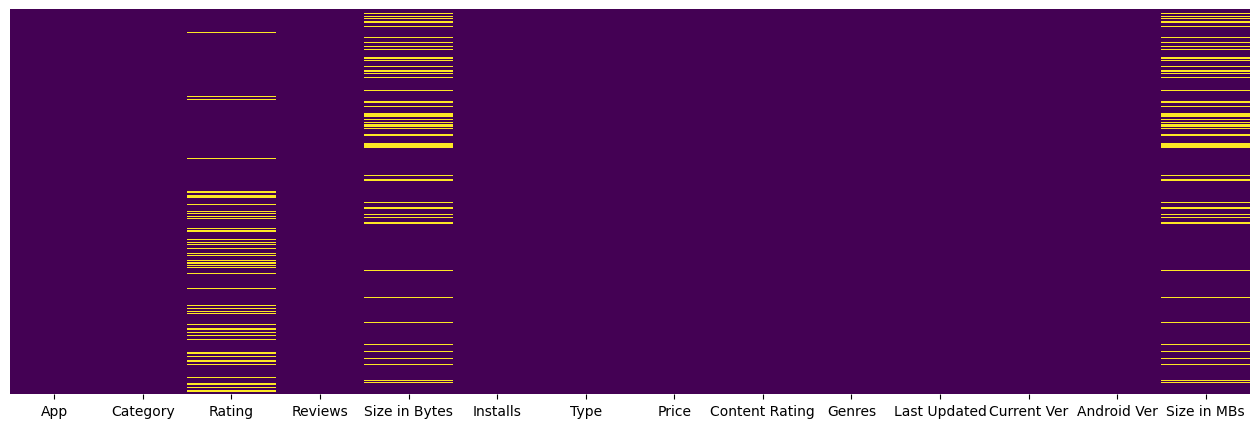

In [43]:
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values')

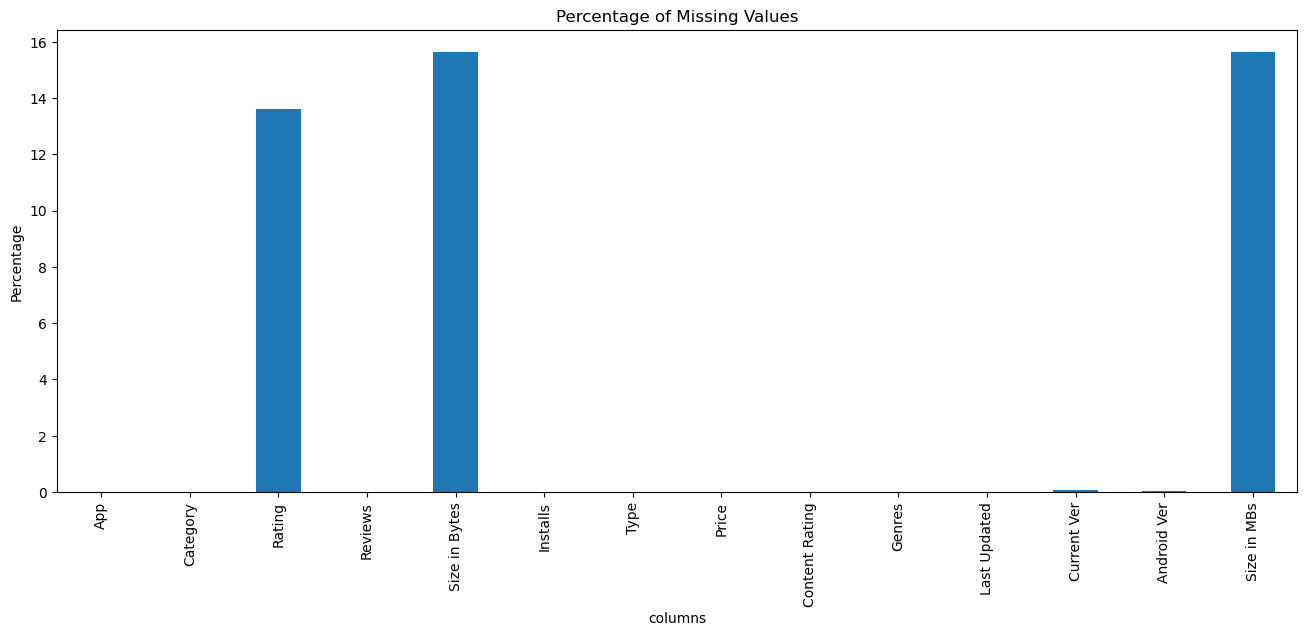

In [44]:
plt.figure(figsize=(16,6))
missing_Percentage = df.isnull().sum()/len(df) *100
missing_Percentage.plot(kind='bar')
plt.xlabel('columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values')

Text(0.5, 1.0, 'Percentage of Missing Values')

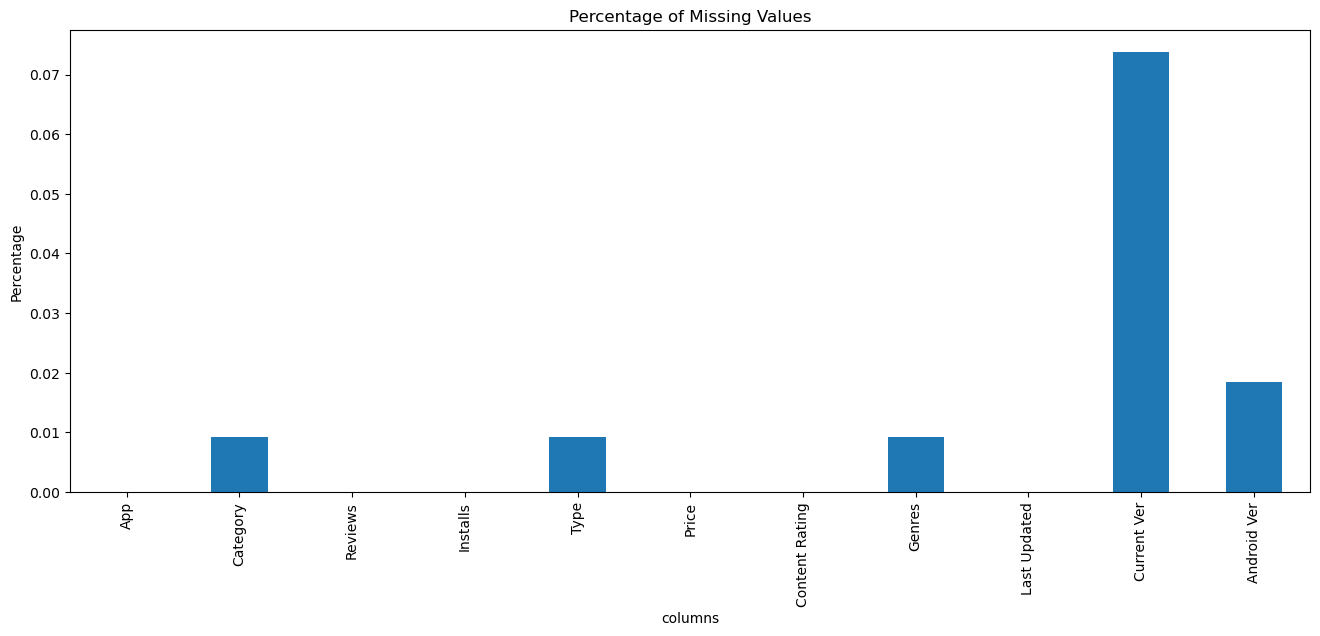

In [45]:
plt.figure(figsize=(16,6))
missing_Percentage = df.isnull().sum()/len(df) *100
missing_Percentage[missing_Percentage<1].plot(kind='bar')
plt.xlabel('columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values')